In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx
from math import *
import pyomo.environ as pe


In [2]:
# functions to be used for calculations, plotting, etc.

def plot_output(x_opt,y_opt):
    plt.figure(figsize=(4,3))
    for i,y_val in enumerate(y_opt):
        if i not in np.concatenate((s_list,t_list)):
            if y_val > 0.5:
                plt.plot(pos[i][0],pos[i][1],"ro")#,markersize=5)
                plt.text(pos[i][0],pos[i][1],"%d" % i)
            else:
                plt.plot(pos[i][0],pos[i][1],"bo")
                plt.text(pos[i][0],pos[i][1],"%d" % i)

    for e in G.edges():
        plt.plot([ pos[e[0]][0],pos[e[1]][0] ], [ pos[e[0]][1],pos[e[1]][1] ], color = "black", linewidth=0.1)
    colors = ["violet","orange","gray"]
    for user_pair in range(C):
        s = s_list[user_pair]
        plt.plot(pos[s][0],pos[s][1],"s", color = colors[user_pair])
        plt.text(pos[s][0],pos[s][1],"%d" % s)
        t = t_list[user_pair]
        plt.plot(pos[t][0],pos[t][1],"s", color = colors[user_pair])
        plt.text(pos[t][0],pos[t][1],"%d" % t)

        edges = np.argwhere(x_opt[user_pair,:,:]>0.5)
        path_output = []
        for e in edges:
            if G.has_edge(e[0],e[1]):
                plt.plot([ pos[e[0]][0],pos[e[1]][0] ], [ pos[e[0]][1],pos[e[1]][1] ], color = colors[user_pair], linewidth=1)
                path_output.append(list(e))
            else:
                path = nx.shortest_path(G, source=e[0], target=e[1], weight="weight")
                path_output.append(path)
                for i in range(len(path)-1):
                    e1 = path[i]
                    e2 = path[i+1]
                    plt.plot([ pos[e1][0],pos[e2][0] ], [ pos[e1][1],pos[e2][1] ], color = colors[user_pair], linewidth=1)

        print((s_list[user_pair],t_list[user_pair]),":",path_output)
#     plt.xlim([0,L0])
#     plt.xlim([0,L0])
    plt.show()
    


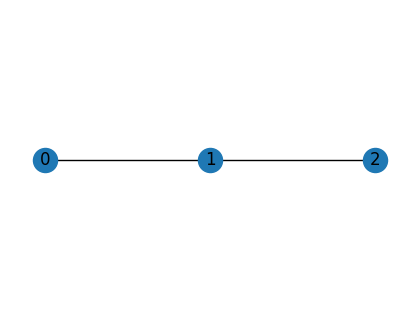

In [7]:
# linear network 
N = 3# number of nodes
node_list = np.arange(N)
G = nx.Graph()
G.add_nodes_from(node_list)
p = 20
adj_mat = np.zeros((N,N))
for n in range(N-1):
    adj_mat[n,n+1] = p
adj_mat += adj_mat.T

pos = dict()
for node in range(N):
    pos[node] = (p*node,0)
    
G = nx.from_numpy_array(adj_mat)
plt.figure(figsize=(4,3))
nx.draw(G, pos = pos,  with_labels=True)
plt.show()


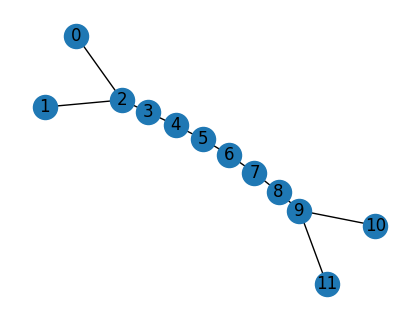

In [3]:
# dumbbell network
Nd = 2 # end user on the sides
Nmid = 8# number of bottleneck nodes
N = 2*Nd+Nmid
node_list = np.arange(N)
G = nx.Graph()
G.add_nodes_from(node_list)
p_d = 1
p_mid = 20

adj_mat = np.zeros((N,N))
for n in range(Nd):
    adj_mat[n,Nd] = p_d
    adj_mat[Nd+Nmid+n,Nd+Nmid-1] = p_d
for n in range(Nd, Nd+Nmid-1):
    adj_mat[n,n+1] = p_mid
adj_mat += adj_mat.T

pos = dict()
for node in range(Nd, Nd+Nmid):
    pos[node] = ((node-Nd),0)
θ = np.pi/(Nd+1)
for node in range(Nd):
    pos[node] = (-np.cos((node+1)*θ-np.pi/2),np.sin((node+1)*θ-np.pi/2))
    pos[node+Nd+Nmid] = ((Nmid-1)+np.cos((1+node)*θ-np.pi/2),np.sin((1+node)*θ-np.pi/2))

G = nx.from_numpy_array(adj_mat)
plt.figure(figsize=(4,3))
nx.draw(G, with_labels=True)#, pos = pos )
plt.show()
# nx.draw(G, with_labels=True, pos = pos )
# print(nx.shortest_path_length(G, source=1, target=2, weight="weight"))

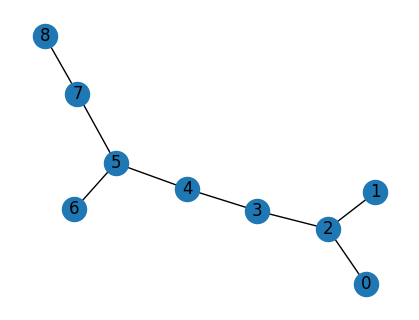

In [4]:
# dumbbell network
Nd = 2 # end user on the sides
Nmid = 4# number of bottleneck nodes
N = 2*Nd+Nmid+1
node_list = np.arange(N)
G = nx.Graph()
G.add_nodes_from(node_list)
p_d = 40
p_mid = p_d

adj_mat = np.zeros((N,N))
for n in range(Nd):
    adj_mat[n,Nd] = p_d
    adj_mat[Nd+Nmid+n,Nd+Nmid-1] = p_d
for n in range(Nd, Nd+Nmid-1):
    adj_mat[n,n+1] = p_mid

pos = dict()
for node in range(Nd, Nd+Nmid):
    pos[node] = ((node-Nd),0)
θ = np.pi/(Nd+1)
for node in range(Nd):
    pos[node] = (-np.cos((node+1)*θ-np.pi/2),np.sin((node+1)*θ-np.pi/2))
    pos[node+Nd+Nmid] = ((Nmid-1)+np.cos((1+node)*θ-np.pi/2),np.sin((1+node)*θ-np.pi/2))

############
# modify dumbbell
# G.add_node(N-1)
pos[N-1] = (Nmid+np.cos((1+node)*θ-np.pi/2),np.sin((1+node)*θ-np.pi/2))
adj_mat[N-2,N-1] = p_d
###########
adj_mat += adj_mat.T
G = nx.from_numpy_array(adj_mat)


plt.figure(figsize=(4,3))
nx.draw(G, with_labels=True)#, pos = pos )
plt.show()
# nx.draw(G, with_labels=True, pos = pos )

# print(nx.shortest_path_length(G, source=8, target=9, weight="weight"))

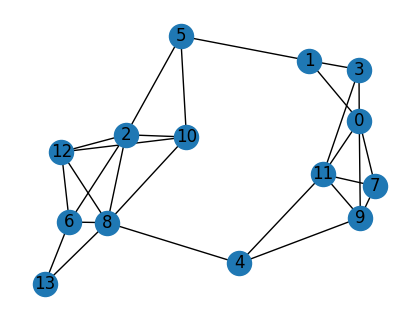

In [39]:
# random network graph of N nodes
N = 14# number of nodes
node_list = np.arange(N)

# nodes are distributed uniformly within an L0xL0 square
L0 = 100 # square dim in km
length = L0
width = L0
# dmax = 0.35*L0 # cut off for elementary links
# random.seed(33)
dmax = 0.4*L0
random.seed(20)
pos = dict()
for node in range(N):
    pos[node] = (random.random()*length,random.random()*width)
    
G = nx.random_geometric_graph(N, dmax, dim=2, pos=pos, p=2)

weights = dict()
transmission = dict()
for e in G.edges():
    dist = np.linalg.norm([pos[e[0]][0]-pos[e[1]][0],pos[e[0]][1]-pos[e[1]][1]])
    weights[e] = dist
    transmission[e] = 10**(-0.2*dist/10)
    
nx.set_edge_attributes(G, values = weights, name = 'weight')
nx.set_edge_attributes(G, values = transmission, name = 'trans')

plt.figure(figsize=(4,3))
nx.draw(G,pos,with_labels=True)
plt.show()

In [5]:
### minimum capacity

Nmax = 2
q = 0.5
F = 0.95
w = 100 # maximum memory allowed for end users
D0 = 140
D = D0*np.ones(N)
# D[Nd+Nmid+1] = 40
# s_list = [0,1] # source
# t_list = [Nd+Nmid,Nd+Nmid+2] # destination
s_list = [10,12,13] # source
t_list = [7,11,9] # destination

C = len(s_list)
R_list = np.array(list(set(node_list)-set(np.concatenate((s_list,t_list)))))


#Create a simple model
model = pe.ConcreteModel()

model.R = pe.Set(initialize=R_list)
model.N = pe.Set(initialize=range(N)) 
model.C = pe.Set(initialize=range(C))
model.x = pe.Var(model.C,model.N,model.N, domain=pe.Binary)#,initialize=0)
model.y = pe.Var(model.R, domain=pe.Binary)#,initialize=1)
model.minCapacity = pe.Var(model.C,domain=pe.NonNegativeReals)
model.memory = pe.Var(model.C, bounds=(1, w),domain=pe.PositiveIntegers)
# model.fidelity = pe.Var(model.C)#,domain=pe.NonNegativeReals)
model.hops = pe.Var(model.C)#,domain=pe.NonNegativeReals)

model.constraints = pe.ConstraintList()

for n1 in R_list:
    n_list = np.array(list(set(R_list)-{n1}))
    sum1_const = 0 
    for user_pair in range(C):
        s = s_list[user_pair]
        t = t_list[user_pair]
        sum1_const += model.memory[user_pair]*model.x[user_pair,n1,t] 
        for n2 in n_list:
            sum1_const += model.memory[user_pair]*model.x[user_pair,n1,n2]
    model.constraints.add( sum1_const <= D[n1]*model.y[n1] )

path_length = 0
for user_pair in range(C):
    s = s_list[user_pair]
    t = t_list[user_pair]

#     model.constraints.add( model.memory[user_pair] <= w )

    for n1 in range(N):
        model.constraints.add(  model.x[user_pair,n1,n1] == 0 ) 
        model.constraints.add(  model.x[user_pair,n1,s] == 0 ) 
        model.constraints.add(  model.x[user_pair,t,n1] == 0 ) 

    number =  model.x[user_pair,s,t]+ sum(model.x[user_pair,s,i]+model.x[user_pair,i,t] for i in model.R)
    for n1 in R_list:
        n_list = np.array(list(set(R_list)-{n1}))
        number += sum(model.x[user_pair,n1,i] for i in n_list)

        if nx.has_path(G, source=s, target=n1):
            l_uv = nx.shortest_path_length(G, source=s, target=n1, weight="weight")
            path_length += l_uv*  model.x[user_pair,s,n1]
            model.constraints.add(model.minCapacity[user_pair] >=  l_uv*model.x[user_pair,s,n1] )

        if nx.has_path(G, source=n1, target=t):
            l_uv = nx.shortest_path_length(G, source=n1, target=t, weight="weight")
            path_length += l_uv* model.x[user_pair,n1,t]
            model.constraints.add(model.minCapacity[user_pair] >=  l_uv*model.x[user_pair,n1,t] )

        path = model.x[user_pair,n1,t] - model.x[user_pair,s,n1]
        for n2 in R_list:
            if n2 != n1:
                path += model.x[user_pair,n1,n2] - model.x[user_pair,n2,n1]
                if nx.has_path(G, source=n1, target=n2):
                    l_uv = nx.shortest_path_length(G, source=n1, target=n2, weight="weight")
                    path_length += l_uv* model.x[user_pair,n1,n2]
                    model.constraints.add(model.minCapacity[user_pair] >=  l_uv*model.x[user_pair,n1,n2] )
    
        model.constraints.add( path == 0 ) 
    l_uv = nx.shortest_path_length(G, source=s, target=t, weight="weight")
    model.constraints.add(model.minCapacity[user_pair] >=  l_uv*model.x[user_pair,s,t] )
    
    model.constraints.add( expr= model.x[user_pair,s,t] + sum(model.x[user_pair,s,i] for i in model.R) == 1)
    model.constraints.add( expr= model.x[user_pair,s,t] + sum(model.x[user_pair,i,t] for i in model.R) == 1)
#     model.constraints.add( model.fidelity[user_pair] == 3*((4*F-1)/3)**number-1)
    model.constraints.add( model.hops[user_pair] == number )
        
model.constraints.add(expr= sum(model.y[i] for i in model.R) <= Nmax)
# model.objective = pe.Objective(rule=ObjRule, sense=pe.maximize)
α = 0.02*np.log(10)
# model.objective = pe.Objective(expr= sum(-α*model.minCapacity[i]+ np.log(q)*model.hops[i] +pe.log(model.fidelity[i]) for i in model.C), sense=pe.maximize)
# model.objective = pe.Objective(expr= sum(-α*model.minCapacity[i]+ pe.log(model.memory[i])+ np.log(q)*model.hops[i] +pe.log(3*((4*F-1)/3)**model.hops[i]-1) for i in model.C), sense=pe.maximize)
model.objective = pe.Objective(expr= sum(-α*model.minCapacity[i]+ pe.log(model.memory[i])+ np.log(q)*model.hops[i] for i in model.C), sense=pe.maximize)

opt = pe.SolverFactory("bonmin",tee=True)
results = opt.solve(model)
results.write()

# model.objective.display()
# model.display()
# model.pprint()

x_opt = np.zeros((C,N,N))
y_opt = np.zeros(N)
for i in R_list:
    y_opt[i] = model.y[i].value

for i in range(N):
    for j in range(N):
        for user_pair in range(C):
            x_opt[user_pair,i,j] =  model.x[user_pair,i,j].value



KeyError: "Index '(1, 0, 11)' is not valid for indexed component 'x'"

optimal memory for  (10, 7)  : 100.0
optimal memory for  (12, 11)  : 60.0
optimal memory for  (13, 9)  : 60.0
objective : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 0.5688134436082666
[0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.] 4.0
(10, 7) : [[1, 0, 7], [5, 1], [10, 5]]
(12, 11) : [[4, 11], [8, 4], [12, 8]]
(13, 9) : [[4, 9], [8, 4], [13, 8]]


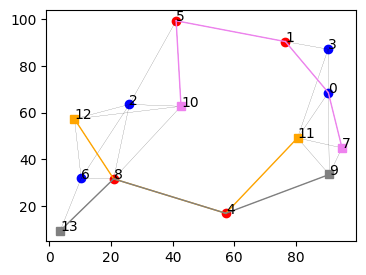

In [252]:
for user_pair in range(C):
    s = s_list[user_pair]
    t = t_list[user_pair]
    print("optimal memory for ", (s,t)," :", model.memory[user_pair].value)#, pe.value(rate[user_pair]) )

model.objective.display()

y_opt = np.zeros(N)
for n1 in R_list:
    n_list = np.array(list(set(R_list)-{n1}))
    sum1_const = 0 
    for user_pair in range(C):
        s = s_list[user_pair]
        t = t_list[user_pair]
        sum1_const += x_opt[user_pair,n1,t] 
        for n2 in n_list:
            sum1_const += x_opt[user_pair,n1,n2]
    if sum1_const>0.5:
        y_opt[n1] = 1
print(y_opt,np.sum(y_opt))


plot_output(x_opt,y_opt)       

# print(model.fidelity[0].value)

## ILP formulation

In [4]:
### minimum capacity

Nmax = 2
q = 0.5
F = 0.95
D0 = 8
D = D0*np.ones(N)
w0 = 4
W_list = np.arange(1,w0+1) # maximum memory allowed for end users
# D[Nd+Nmid+1] = 40
# s_list = [0] # source
# t_list = [N-1] # destination
s_list = [0,1] # source
t_list = [Nd+Nmid,Nd+Nmid+1] # destination
# s_list = [12]#[10]#,12,13] # source
# t_list = [7]#,11,9] # destination

C = len(s_list)
R_list = np.array(list(set(node_list)-set(np.concatenate((s_list,t_list)))))

#Create a simple model
model = pe.ConcreteModel()

model.R = pe.Set(initialize=R_list)
model.N = pe.Set(initialize=range(N)) 
model.C = pe.Set(initialize=range(C))
model.W = pe.Set(initialize=W_list)
model.x = pe.Var(model.C,model.W,model.N,model.N, domain=pe.Binary)#,initialize=0)
model.y = pe.Var(model.R, domain=pe.Binary)#,initialize=1)
model.minCapacity = pe.Var(model.C,domain=pe.NonNegativeReals)
model.whichmemory = pe.Var(model.C,model.W)#,domain=pe.NonNegativeReals)
model.hops = pe.Var(model.C)#,domain=pe.NonNegativeReals)

model.constraints = pe.ConstraintList()

for n1 in R_list:
    n_list = np.array(list(set(R_list)-{n1}))
    sum1_const = 0 
    for user_pair in range(C):
        s = s_list[user_pair]
        t = t_list[user_pair]
        sum1_const += sum( i*model.x[user_pair,i,n1,t] for i in model.W) 
        for n2 in n_list:
            sum1_const += sum( i*model.x[user_pair,i,n1,n2] for i in model.W) 
            model.constraints.add( sum(model.x[user_pair,i,n1,n2] for i in model.W)<=1 )
        
    model.constraints.add( sum1_const <= D[n1]*model.y[n1] )

path_length = 0
for user_pair in range(C):
    s = s_list[user_pair]
    t = t_list[user_pair]
    path_s = 0
    path_t = 0
    number = 0
    for memory in model.W:

#         for n1 in range(N):
#             model.constraints.add(  model.x[user_pair,memory,n1,n1] == 0 ) 
#             model.constraints.add(  model.x[user_pair,memory,n1,s] == 0 ) 
#             model.constraints.add(  model.x[user_pair,memory,t,n1] == 0 ) 

        number +=  model.x[user_pair,memory,s,t]+ sum(model.x[user_pair,memory,s,i]+model.x[user_pair,memory,i,t] for i in model.R)
        for n1 in R_list:
            n_list = np.array(list(set(R_list)-{n1}))
            number += sum(model.x[user_pair,memory,n1,i] for i in n_list)

            if nx.has_path(G, source=s, target=n1):
                l_uv = nx.shortest_path_length(G, source=s, target=n1, weight="weight")
                path_length += l_uv*  model.x[user_pair,memory,s,n1]
                model.constraints.add(model.minCapacity[user_pair] >=  l_uv*model.x[user_pair,memory,s,n1] )

            if nx.has_path(G, source=n1, target=t):
                l_uv = nx.shortest_path_length(G, source=n1, target=t, weight="weight")
                path_length += l_uv* model.x[user_pair,memory,n1,t]
                model.constraints.add(model.minCapacity[user_pair] >=  l_uv*model.x[user_pair,memory,n1,t] )

            path = model.x[user_pair,memory,n1,t] - model.x[user_pair,memory,s,n1]
            for n2 in R_list:
                if n2 != n1:
                    path += model.x[user_pair,memory,n1,n2] - model.x[user_pair,memory,n2,n1]
                    if nx.has_path(G, source=n1, target=n2):
                        l_uv = nx.shortest_path_length(G, source=n1, target=n2, weight="weight")
                        path_length += l_uv* model.x[user_pair,memory,n1,n2]
                        model.constraints.add(model.minCapacity[user_pair] >=  l_uv*model.x[user_pair,memory,n1,n2] )

            model.constraints.add( path == 0 ) 
        l_uv = nx.shortest_path_length(G, source=s, target=t, weight="weight")
        model.constraints.add(model.minCapacity[user_pair] >=  l_uv*model.x[user_pair,memory,s,t] )
        
        path_s += model.x[user_pair,memory,s,t] + sum(model.x[user_pair,memory,s,i] for i in model.R) 
        path_t += model.x[user_pair,memory,s,t] + sum(model.x[user_pair,memory,i,t] for i in model.R)
        model.constraints.add( model.whichmemory[user_pair,memory]== model.x[user_pair,memory,s,t] + sum(model.x[user_pair,memory,s,i] for i in model.R) )
#         model.constraints.add( expr= model.x[user_pair,memory,s,t] + sum(model.x[user_pair,memory,i,t] for i in model.R) == 1)
#     #     model.constraints.add( model.fidelity[user_pair] == 3*((4*F-1)/3)**number-1)
    model.constraints.add( model.hops[user_pair] == number )
    model.constraints.add( path_s== 1)
    model.constraints.add( path_t== 1)
    
# model.constraints.add(expr= sum(model.y[i] for i in model.R) <= Nmax)
# model.objective = pe.Objective(rule=ObjRule, sense=pe.maximize)
α = 0.02*np.log(10)
# model.objective = pe.Objective(expr= sum(-α*model.minCapacity[i]+ np.log(q)*model.hops[i] +pe.log(model.fidelity[i]) for i in model.C), sense=pe.maximize)
# model.objective = pe.Objective(expr= sum(-α*model.minCapacity[i]+ pe.log(model.memory[i])+ np.log(q)*model.hops[i] +pe.log(3*((4*F-1)/3)**model.hops[i]-1) for i in model.C), sense=pe.maximize)
model.objective = pe.Objective(expr= sum(-α*model.minCapacity[i]+ sum(model.whichmemory[i,m]*np.log(m) for m in model.W) + np.log(q)*model.hops[i] for i in model.C), sense=pe.maximize)
# λ = 1e-2
# model.objective = pe.Objective(expr= (sum(pe.log(model.minCapacity[i]*fidelity[i]) for i in model.C) - λ* path_length), sense=pe.maximize)
# model.objective = pe.Objective(expr= model.minCapacity[0]*fidelity[0] , sense=pe.maximize)

# opt = pe.SolverFactory("baron",tee=True)
opt = pe.SolverFactory("cplex",tee=True,executable="/Applications/CPLEX_Studio_Community2211/cplex/bin/x86-64_osx/cplex")
results = opt.solve(model)
results.write()

# model.objective.display()
# model.display()
# model.pprint()

x_opt = np.zeros((C,len(W_list),N,N))
y_opt = np.zeros(N)
for i in R_list:
    y_opt[i] = model.y[i].value

for i in range(N):
    for j in range(N):
        for user_pair in range(C):
            for i_m, memory in enumerate(W_list):
                x_opt[user_pair,i_m,i,j] =  model.x[user_pair,memory,i,j].value



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: tmpsj15cx5c
  Lower bound: -6.548828274750015
  Upper bound: -6.5482634152
  Number of objectives: 1
  Number of constraints: 783
  Number of variables: 605
  Number of nonzeros: 3971
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: 1.87
  Termination condition: optimal
  Termination message: MIP - Integer optimal, tolerance (0.0001/1e-06)\x3a Objective = -6.5488282748e+00
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 11419
      Number of created subproblems: 11419
  Er

objective : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : -6.548828274750017
[0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.] 5.0
optimal memory for  (0, 10)  : 4
(0, 10) : [[0, 2, 3], [3, 4, 5], [5, 6, 7], [7, 8, 9, 10]]
optimal memory for  (1, 11)  : 4
(1, 11) : [[1, 2, 3, 4], [4, 5, 6], [6, 7], [7, 8, 9, 11]]


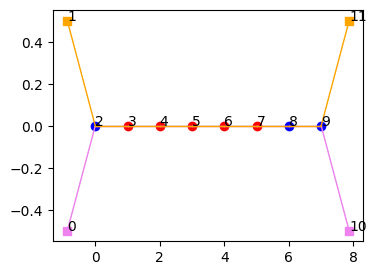

In [5]:
# functions to be used for calculations, plotting, etc.

def plot_output_lp(x_opt,y_opt):
    plt.figure(figsize=(4,3))
    for i,y_val in enumerate(y_opt):
        if i not in np.concatenate((s_list,t_list)):
            if y_val > 0.5:
                plt.plot(pos[i][0],pos[i][1],"ro")#,markersize=5)
                plt.text(pos[i][0],pos[i][1],"%d" % i)
            else:
                plt.plot(pos[i][0],pos[i][1],"bo")
                plt.text(pos[i][0],pos[i][1],"%d" % i)

    for e in G.edges():
        plt.plot([ pos[e[0]][0],pos[e[1]][0] ], [ pos[e[0]][1],pos[e[1]][1] ], color = "black", linewidth=0.1)
    colors = ["violet","orange","gray"]
    for user_pair in range(C):
        s = s_list[user_pair]
        plt.plot(pos[s][0],pos[s][1],"s", color = colors[user_pair])
        plt.text(pos[s][0],pos[s][1],"%d" % s)
        t = t_list[user_pair]
        plt.plot(pos[t][0],pos[t][1],"s", color = colors[user_pair])
        plt.text(pos[t][0],pos[t][1],"%d" % t)
        for i_m, memory in enumerate(W_list):

            edges = np.argwhere(x_opt[user_pair,i_m,:,:]>0.5)
            if len(edges)>0:
                print("optimal memory for ", (s,t)," :", memory)
                path_output = []
                for e in edges:
                    if G.has_edge(e[0],e[1]):
                        plt.plot([ pos[e[0]][0],pos[e[1]][0] ], [ pos[e[0]][1],pos[e[1]][1] ], color = colors[user_pair], linewidth=1)
                        path_output.append(list(e))
                    else:
                        path = nx.shortest_path(G, source=e[0], target=e[1], weight="weight")
                        path_output.append(path)
                        for i in range(len(path)-1):
                            e1 = path[i]
                            e2 = path[i+1]
                            plt.plot([ pos[e1][0],pos[e2][0] ], [ pos[e1][1],pos[e2][1] ], color = colors[user_pair], linewidth=1)

        print((s_list[user_pair],t_list[user_pair]),":",path_output)
#     plt.xlim([0,L0])
#     plt.xlim([0,L0])
    plt.show()
    


for user_pair in range(C):
    s = s_list[user_pair]
    t = t_list[user_pair]
#     print("optimal memory for ", (s,t)," :", model.memory[user_pair].value)#, pe.value(rate[user_pair]) )

model.objective.display()

y_opt = np.zeros(N)
for n1 in R_list:
    n_list = np.array(list(set(R_list)-{n1}))
    sum1_const = 0 
    for user_pair in range(C):
        s = s_list[user_pair]
        t = t_list[user_pair]
        for memory in range(len(W_list)):
            sum1_const += x_opt[user_pair,memory,n1,t] 
            for n2 in n_list:
                sum1_const += x_opt[user_pair,memory,n1,n2]
    if sum1_const>0.5:
        y_opt[n1] = 1
print(y_opt,np.sum(y_opt))


plot_output_lp(x_opt,y_opt) 
# print(model.fidelity[0].value)

In [12]:
print(t_list)

[6, 8]
